#**Polyhedron representation**

A convex polytope is a special case of a polytope, having the additional property that it is also a convex set contained in the $n$-dimensional Euclidean space $\mathbb {R}^{n}$.

> A convex polytope may be defined as an intersection of a finite number of half-spaces. Such definition is called a half-space representation ($H$-representation or $H$-description). This can be concisely written as the matrix inequality:
\begin{equation}
A x \leq b
\end{equation}
where $A$ is an $m\times n$ matrix, $x$ is an ${\displaystyle n\times 1}$ column vector whose coordinates are the variables $x_{1}$ to $x_{n}$, and $b$ is an ${\displaystyle m\times 1}$ column vector whose coordinates are the right-hand sides $b_{1}$ to $b_{m}$ of the scalar inequalities.

>A convex polytope may be defined as the convex hull of its vertices + the conic hull of its rays where '+' is the Minkowski sum. This is equivalent to defining a bounded convex polytope as the convex hull of a finite set of points, where the finite set must contain the set of extreme points of the polytope. This representation is called $V$-representation and can be written
\begin{equation}
x=conv(V)+coni(R)
\end{equation}
where $conv$ denotes the convex hull of a set of vertices $V=\{v_1, ... ,v_p\}$:
\begin{equation}
conv(V) = \Bigl\{ \sum_{i=1}^{p} α_i v_i \quad \textrm{s.t.} \quad \forall i, \alpha_i \geq 0, \sum_{i=1}^{p} α_i =1 \Bigr\}
\end{equation}
while $coni$ is the conical hull os a set of rays $R=\{r_1,...,r_q\}$:
\begin{equation}
coni(R) = \Bigl\{ \sum_{j=1}^{q} \lambda_i r_i \quad \textrm{s.t.} \quad \forall j, \lambda_i \geq 0 \Bigr\}
\end{equation}

**Example**

$H$-representation
\begin{equation}
\begin{aligned}
\begin{bmatrix} 0 & 1 \\ 5 & -2\\ -1 & -3\\-4 & -2 \end{bmatrix}
\begin{bmatrix} x\\y \end{bmatrix} \leq
\begin{bmatrix} 7 \\ 36 \\ -14 \\ -26 \end{bmatrix}
\end{aligned}
\end{equation}

$V$-representation
\begin{equation}
V=\{(3,7),(10,7),(8,2),(5,3)\}
\end{equation}

*Theorem (Minkowski and Weyl)*: any polyhedron can be equivalently described in halfspace or vertex representation. That is, for any set
$P = \{ x \, | \, A x \leq b\}$, there exists two sets $V$ and $R$ such that $P=conv(V)+coni(R)$, and conversely.

In [ ]:
!pip install polytope

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for polytope: filename=polytope-0.2.5-py3-none-any.whl size=47765 sha256=8f3c655d781bfdfbbc483abedfe6d17ff293a03463264c95f68b63718a5e2efd
  Stored in directory: /root/.cache/pip/wheels/0a/dc/7c/19db8e9a73e1a551591347b185108f137877f9638ee8f8e3cc
Successfully built polytope


In [ ]:
import numpy as np
import polytope
import matplotlib.pyplot as plt

vertices = np.array([[3, 7], [10, 7], [8, 2], [5, 3]])
poly = polytope.qhull(vertices)  # convex hull
    # `poly` is an instance of the class `polytope.polytope.Polytope`,
    # which is for representing convex polytopes.
    # Nonconvex polytopes can be represented too,
    # using the class `polytope.polytope.Region`.
print('Halfspace representation of convex polytope:')
print('matrix A:')
print(poly.A)
print('vector b:')
print(poly.b)

Halfspace representation of convex polytope:
matrix A:
[[-0.31623 -0.94868]
 [ 0.92848 -0.37139]
 [-0.89443 -0.44721]
 [-0.       1.     ]]
vector b:
[-4.42719  6.68503 -5.81378  7.     ]


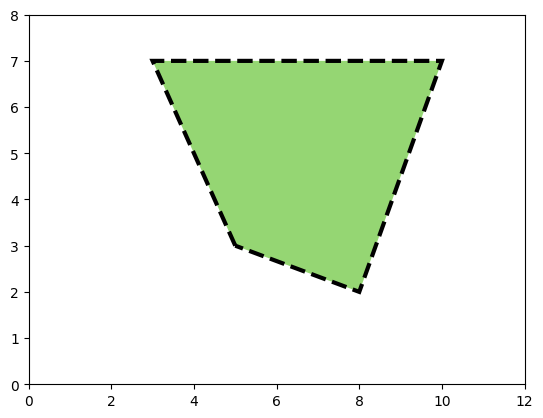

In [ ]:
poly.plot()
plt.xlim(0,12)
plt.ylim(0,8)
plt.show()

#**Quadratically Constrained Quadratic Program**

General form of a quadratically constrained quadratic program (QCQP) is given below:

\begin{equation}
\begin{aligned}
& \underset{\mathbf{x}}{\text{minimize}}
& & \mathbf{x}^\top \mathbf{P}_0 \mathbf{x} + \mathbf{q}_0^\top\mathbf{x}, \\
& \text{subject to}
& & \begin{cases}
    \mathbf{x}^\top \mathbf{P}_i \mathbf{x} + \mathbf{q}_i^\top\mathbf{x} + r_i \leq 0, \\
    \mathbf{A}\mathbf{x} = \mathbf{b}.
    \end{cases}
\end{aligned}
\end{equation}

where $\mathbf{P}_i$ are positive-definite.

## Task 1

Concider the following QCQP problem
\begin{equation}
\begin{aligned}
\min_{x} \quad & x_1^2 + x_2^2\\
\textrm{s.t.} \quad & (x_1 - 1)^2 + (x_2 - 1)^2 \leq 1\\
& (x_1 - 1)^2 + (x_2 + 1)^2 \leq 1
\end{aligned}
\end{equation}
Sketch the feasible set. Find the optimal point and optimal value.

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.9999999465273566
[9.99999973e-01 5.11252039e-09]


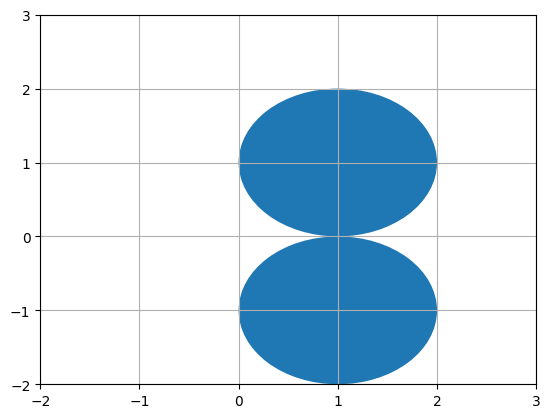

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

x = cp.Variable(2)
P0 = np.array([[2, 0], [0, 2]])
P1 = np.array([[2, 0], [0, 2]])
q1 = np.array([[-2],[-2]])
P2 = np.array([[2, 0], [0, 2]])
q2 = np.array([[-2],[2]])

objective = cp.Minimize((1/2)*cp.quad_form(x, P0))
constraints = [(1/2)*cp.quad_form(x, P1) + q1.T @ x <= -1,
               (1/2)*cp.quad_form(x, P2) + q2.T @ x <= -1]
problem = cp.Problem(objective, constraints)

solution = problem.solve(verbose=False)
print(solution)
print(x.value.T)

ax = plt.gca()
ax.clear()
xc1 = np.array([1, 1])
xc2 = np.array([1, -1])
circle1 = plt.Circle(xc1, 1, fill=True)
ax.add_patch(circle1)
circle2 = plt.Circle(xc2, 1, fill=True)
ax.add_patch(circle2)
plt.xlim(-2,3)
plt.ylim(-2,3)
plt.grid()
plt.show()

#**Second-Order Сone Programming**
The general form of a Second-order cone program (SOCP) is:

\begin{equation}
\begin{aligned}
& \underset{\mathbf{x}}{\text{minimize}}
& & \mathbf{f}^\top\mathbf{x}, \\
& \text{subject to}
& & \begin{cases}
    ||\mathbf{A}_i\mathbf{x} + \mathbf{b}_i||_2 \leq
     \mathbf{c}_i^\top \mathbf{x} + d_i, \\
    \mathbf{F}\mathbf{x} = \mathbf{g}.
    \end{cases}
\end{aligned}
\end{equation}

#**Friction cones**
 A 2D mass is in contact with a single surface. This contact will remain fixed as long as the contact force $f^c = mg-f^{ext}$ lies within the Coulomb friction cone $C$.

 ![picture]( https://drive.google.com/uc?id=1ZMBRK3KDmMH9YktLVzqjv-eu23_esEVN)

Let $f$ be total reaction force, $f_n$ - normal component, $f_{fr}$ - tangential component or fricition force.

Let $e_n$ be a unit vector normal to the surface at the point of contact
\begin{equation}
f=f_n+f_{fr}
\end{equation}

Then defining $E_t = [e_{t,1}, e_{t,2}]=null(e_n^T)$, be an orthonormal basis in the tangential space to the surface we can write
\begin{equation}
f=e_n n +E_t t \\
f_n = e_n n \\
f_{fr} = E_t t, t \in [t_1, t_2]
\end{equation}
We can describe the friction cone
\begin{equation}
|| E_t^T f || \leq \mu e_n^T f
\end{equation}

Links: [Вывод для конуса трения](https://scaron.info/robotics/friction-cones.html#coulomb-friction)

## Task 2
Assume that you have a walking robot standing on 4 feet. We model the robot as a point-mass with four reaction forces acting on it:
\begin{equation}
    \begin{cases}
    m\mathbf{\ddot{r}_c}=\mathbf{f_1}+\mathbf{f_2}+\mathbf{f_3}+\mathbf{f_4}+m\mathbf{g}\\
    0= \sum\limits_{i=1}^{4}(\mathbf{r_i}-\mathbf{r_C})\times \mathbf{f_i}
    \end{cases}
\end{equation}
where $\mathbf{r_C} \in \mathbb{R}^3$ is the position of the center of mass of the robot, $\mathbf{f_i}\in \mathbb{R}^3$ are the reaction forces, $\mathbf{r_i}\in \mathbb{R}^3$ are the positions of the feet, $m$ is the mass of the robot and $\mathbf{g}=\begin{bmatrix}
    0\\0\\-9.8
\end{bmatrix}$ is the gravitational vector.

We additionally assume that the reaction forces lie in the friction cone, with friction coefficient $\mu$.

> Given $\mathbf{r_C}$, and $\mathbf{r_i}$ find if there exist reaction forces that allow the robot to maintain static stability with $\mathbf{\ddot{r}_c}=0$, given that the robot stands on horizontal ground.

\begin{equation}
    \begin{cases}
    0 =\mathbf{f_1}+\mathbf{f_2}+\mathbf{f_3}+\mathbf{f_4}+m\mathbf{g}\\
    0= \sum\limits_{i=1}^{4}(\mathbf{r_i}-\mathbf{r_C})\times \mathbf{f_i}
    \end{cases}
\end{equation}

\begin{equation}
n(r-r_0) = 0 \\
n = \begin{bmatrix}
0 \\ 0 \\ 1
\end{bmatrix}
\end{equation}
Using left-null space of $n$ we find a basis for the horisontal ground
\begin{equation}
e_1 =
\begin{bmatrix}
0 & -1\\
1 & 0 \\
0 & 0
\end{bmatrix}
\end{equation}

We use this basis to generate the contact points of the four feet.
$$
r_i=\alpha_ie_{1}[0]+\beta_ie_{1}[1]
$$
After that we can calculate the position of the center of mass.
We use skew-symetric matrix to express the cross product:  $(r_i-r_c)\times f_i=R_{i[\times]}f_i$, where
$$
R_{i[\times]}=R_{\times}(r_i-r_c)
$$.
So the equations of the robot dynamics are:
$$
f_1+f_2+f_3+f_4=-mg\\
\sum_{i=1}^{4} R_{i[\times]}f_i=0
$$
We combine these two equations into one equation:
$$
\begin{bmatrix}
I_{3×3} & I_{3×3} & I_{3×3} & I_{3×3}\\
R_{1[\times]} & R_{2[\times]} & R_{3[\times]} & R_{4[\times]}
\end{bmatrix}
\begin{bmatrix}
f_1 \\ f_2 \\f_3\\f_4
\end{bmatrix}=
\begin{bmatrix}
-mg\\0_{1\times 3}
\end{bmatrix}
$$
and can rewrite the previous equation in the form:
$$Af=b$$
where $f=[f_1,f_2,f_3,f_4]^T$
and it defines an equality constraint for our optimization problem.

We choose cost function as sum of norm of reaction force because we need find the smallest recation forces that keep the robot standing.
Also the reaction forces lie in the friction cone, with friction coefficient
$µ$ and this means that each reaction force should have the following cone constraint:
$$
||e_{t1}^Tf_i|| ≤ µn_1^Tf_i
$$
And the final optimization problem is:
$$
\begin{equation}
\begin{aligned}
\min_{f_i, i=1,..,4} \quad & \sum_{i=1}^{4}||f_i||\\
\textrm{s.t.} \quad & Af =b\\
 & ||e_{t1}^Tf_i|| ≤ µn_1^Tf_i \\
&  i=1,2,3,4
\end{aligned}
\end{equation}
$$


